In [49]:
from collections import defaultdict
import glob
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [9]:
folder = '/home/olga/data_lg/kmer-hashing/brawand2011/kmermaid/results_peptide7/extract_coding'

globber = f'{folder}/*json'

In [59]:
coding_summaries = defaultdict(list)

for filename in tqdm(glob.iglob(globber)):
    sample_id = os.path.basename(filename).split('__')[0]
    with open(filename) as f:
        data = json.load(f)
        for key, values in data.items():
            values['filename'] = filename
            values['sample_id'] = sample_id
            coding_summaries[key].append(values)
classification_percentages = pd.DataFrame(
    coding_summaries['classification_percentages'])
print(classification_percentages.shape)
classification_percentages.head()

147it [00:00, 724.75it/s]

(147, 8)


,Non-coding,Coding,No translation frames without stop codons,All translations shorter than peptide k-mer size + 1,Read length was shorter than 3 * peptide k-mer size,Low complexity peptide in protein encoding,filename,sample_id
0,68.549280,26.416538,4.030022,0.872370,0.075918,0.055873,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306802_GSM752655_ggo_cb_F_1
1,76.458843,18.913639,3.486677,0.801294,0.064244,0.275304,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306765_GSM752619_mmu_cb_M_2
2,78.203007,16.819733,4.308748,0.599139,0.042650,0.026723,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306782_GSM752636_mml_ht_F_1
3,78.245375,15.101219,5.841887,0.738069,0.015459,0.057990,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306750_GSM752598_mdo_ht_M_1
4,86.181560,9.365462,3.264713,1.088898,0.039388,0.059979,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306753_GSM752606_mdo_lv_F_1


In [60]:
classification_value_counts = pd.DataFrame(coding_summaries['classification_value_counts'])
print(classification_value_counts.shape)
classification_value_counts.head()

(147, 8)


,Non-coding,Coding,No translation frames without stop codons,All translations shorter than peptide k-mer size + 1,Read length was shorter than 3 * peptide k-mer size,Low complexity peptide in protein encoding,filename,sample_id
0,17745562,6838530,1043264,225833,19653,14464,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306802_GSM752655_ggo_cb_F_1
1,18725643,4632166,853927,196246,15734,67425,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306765_GSM752619_mmu_cb_M_2
2,18854705,4055229,1038837,144452,10283,6443,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306782_GSM752636_mml_ht_F_1
3,23748735,4583464,1773107,224016,4692,17601,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306750_GSM752598_mdo_ht_M_1
4,15749357,1711503,596614,198992,7198,10961,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306753_GSM752606_mdo_lv_F_1


In [61]:
jaccard_info = pd.DataFrame(coding_summaries['jaccard_info'])
print(jaccard_info.shape)
jaccard_info.head()

(147, 10)


,count,mean,std,min,25%,50%,75%,max,filename,sample_id
0,24584092.0,0.403002,0.403314,0.0,0.055556,0.187500,0.937500,1.0,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306802_GSM752655_ggo_cb_F_1
1,23357809.0,0.335524,0.369788,0.0,0.058824,0.142857,0.600000,1.0,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306765_GSM752619_mmu_cb_M_2
2,22909934.0,0.306304,0.360734,0.0,0.052632,0.125000,0.500000,1.0,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306782_GSM752636_mml_ht_F_1
3,28332199.0,0.319659,0.348863,0.0,0.055556,0.166667,0.555556,1.0,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306750_GSM752598_mdo_ht_M_1
4,17460860.0,0.249154,0.301268,0.0,0.052632,0.117647,0.333333,1.0,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306753_GSM752606_mdo_lv_F_1


In [62]:
folder = '/home/olga/googledrive/brawand2011/metadata'
metadata = pd.read_csv(f"{folder}/brawand2011_metadata.csv", index_col=0)
print(metadata.shape)
metadata.head()

(106, 8)


,sra_id,geo_id,species_abbrev,tissue_abbrev,sex,replicate,species,tissue
sample_id,,,,,,,,
SRR306855_GSM752705_hsa_lv_M_1,SRR306855,GSM752705,hsa,lv,M,1,Human,Liver
SRR306825_GSM752678_ptr_ts_M_1,SRR306825,GSM752678,ptr,ts,M,1,Chimpanzee,Testis
SRR306755_GSM752611_mdo_ts_M_1,SRR306755,GSM752611,mdo,ts,M,1,Opossum,Testis
SRR306850_GSM752701_hsa_ht_M_2,SRR306850,GSM752701,hsa,ht,M,2,Human,Heart
SRR306805_GSM752658_ggo_ht_M_1,SRR306805,GSM752658,ggo,ht,M,1,Gorilla,Heart


In [63]:
annotations  = pd.DataFrame(list(classification_percentages.sample_id.str.split("_").values), 
                            columns=['sra_id', 'geo_id', 'species_abbrev', 'tissue_abbrev', 'sex', 'replicate'],
                            index=classification_percentages.sample_id)

abbrev_to_animal = {
    'hsa': "Human",
    'ptr': "Chimpanzee",
    'ppa': "Bonobo",
    'ggo': "Gorilla",
    'ppy': "Orangutan",
    'mml': "Macaque",
    'mmu': "Mouse",
    'mdo': "Opossum",
    'oan': "Platypus",
    'gga': "Chicken"
}
abbrev_to_tissue = {
    "cb": "Cerebellum", 
    'ht': "Heart",
    'lv': "Liver",
    'br': "Brain",
    'ts': "Testis",
    'kd': "Kidney",
}
annotations['species'] = annotations.species_abbrev.map(abbrev_to_animal)
annotations['replicate'] = annotations.replicate.astype(int)
annotations['tissue'] = annotations.tissue_abbrev.map(abbrev_to_tissue)
annotations.head()

,sra_id,geo_id,species_abbrev,tissue_abbrev,sex,replicate,species,tissue
sample_id,,,,,,,,
SRR306802_GSM752655_ggo_cb_F_1,SRR306802,GSM752655,ggo,cb,F,1,Gorilla,Cerebellum
SRR306765_GSM752619_mmu_cb_M_2,SRR306765,GSM752619,mmu,cb,M,2,Mouse,Cerebellum
SRR306782_GSM752636_mml_ht_F_1,SRR306782,GSM752636,mml,ht,F,1,Macaque,Heart
SRR306750_GSM752598_mdo_ht_M_1,SRR306750,GSM752598,mdo,ht,M,1,Opossum,Heart
SRR306753_GSM752606_mdo_lv_F_1,SRR306753,GSM752606,mdo,lv,F,1,Opossum,Liver


In [64]:
classification_percentages_metadata = classification_percentages.join(
    annotations, on='sample_id')
print(classification_percentages_metadata.shape)
classification_percentages_metadata.head()

(147, 16)


,Non-coding,Coding,No translation frames without stop codons,All translations shorter than peptide k-mer size + 1,Read length was shorter than 3 * peptide k-mer size,Low complexity peptide in protein encoding,filename,sample_id,sra_id,geo_id,species_abbrev,tissue_abbrev,sex,replicate,species,tissue
0,68.549280,26.416538,4.030022,0.872370,0.075918,0.055873,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306802_GSM752655_ggo_cb_F_1,SRR306802,GSM752655,ggo,cb,F,1,Gorilla,Cerebellum
1,76.458843,18.913639,3.486677,0.801294,0.064244,0.275304,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306765_GSM752619_mmu_cb_M_2,SRR306765,GSM752619,mmu,cb,M,2,Mouse,Cerebellum
2,78.203007,16.819733,4.308748,0.599139,0.042650,0.026723,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306782_GSM752636_mml_ht_F_1,SRR306782,GSM752636,mml,ht,F,1,Macaque,Heart
3,78.245375,15.101219,5.841887,0.738069,0.015459,0.057990,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306750_GSM752598_mdo_ht_M_1,SRR306750,GSM752598,mdo,ht,M,1,Opossum,Heart
4,86.181560,9.365462,3.264713,1.088898,0.039388,0.059979,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306753_GSM752606_mdo_lv_F_1,SRR306753,GSM752606,mdo,lv,F,1,Opossum,Liver


### Write to CSV

In [103]:
outdir = '/home/olga/googledrive/brawand2011/data/kmermaid/results_peptide7/extract_coding'
! mkdir -p $outdir
classification_percentages_metadata.to_csv(f'{outdir}/classification_percentages_metadata.csv', index=False)

In [76]:
classification_percentages_metadata.query('species == "Chimpanzee" & tissue == "Brain"').set_index('sample_id').sort_index()

,Non-coding,Coding,No translation frames without stop codons,All translations shorter than peptide k-mer size + 1,Read length was shorter than 3 * peptide k-mer size,Low complexity peptide in protein encoding,filename,sra_id,geo_id,species_abbrev,tissue_abbrev,sex,replicate,species,tissue
sample_id,,,,,,,,,,,,,,,
SRR306811_GSM752664_ptr_br_F_1,68.173560,29.384558,2.248509,0.030818,0.106429,0.056126,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306811,GSM752664,ptr,br,F,1,Chimpanzee,Brain
SRR306812_GSM752665_ptr_br_M_1,63.930153,30.280198,5.273625,0.425665,0.052298,0.038060,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306812,GSM752665,ptr,br,M,1,Chimpanzee,Brain
SRR306813_GSM752666_ptr_br_M_2,73.896364,16.765986,9.086402,0.115426,0.109028,0.026794,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306813,GSM752666,ptr,br,M,2,Chimpanzee,Brain
SRR306814_GSM752667_ptr_br_M_3,71.964817,21.031268,6.295106,0.549880,0.128400,0.030530,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306814,GSM752667,ptr,br,M,3,Chimpanzee,Brain
SRR306815_GSM752668_ptr_br_M_4,69.492201,19.851170,10.422327,0.098496,0.110284,0.025521,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306815,GSM752668,ptr,br,M,4,Chimpanzee,Brain
SRR306816_GSM752669_ptr_br_M_5,74.108501,17.760828,7.867049,0.079883,0.164717,0.019023,/home/olga/data_lg/kmer-hashing/brawand2011/km...,SRR306816,GSM752669,ptr,br,M,5,Chimpanzee,Brain


In [65]:
order = ['Human', "Chimpanzee", "Bonobo", "Gorilla", "Orangutan", 
         "Macaque", "Mouse", "Opossum", 'Platypus', 'Chicken']

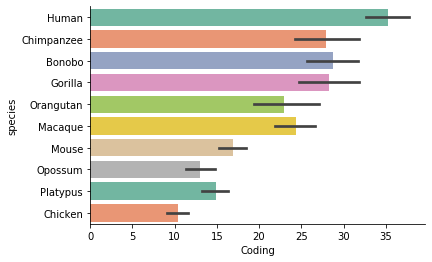

In [66]:
sns.barplot(y='species', x='Coding', data=classification_percentages_metadata,
           order=order, palette='Set2')
sns.despine()

In [67]:
color_cols = ['species', 'tissue', 'replicate', 'sex']
palette_names = ['Set2', 'tab10', 'Accent', 'Paired']
palettes = dict(zip(color_cols, palette_names))
palettes

{'species': 'Set2', 'tissue': 'tab10', 'replicate': 'Accent', 'sex': 'Paired'}

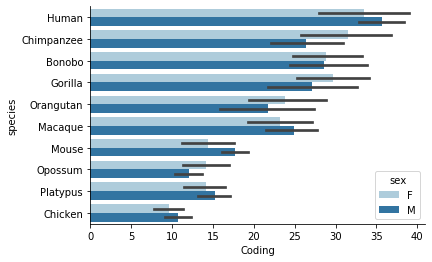

In [68]:
sns.barplot(y='species', x='Coding', data=classification_percentages_metadata,
           order=order, palette='Paired', hue='sex')
sns.despine()

In [69]:
cols = 'Non-coding	Coding	No translation frames without stop codons	All translations shorter than peptide k-mer size + 1	Read length was shorter than 3 * peptide k-mer size	Low complexity peptide in protein encoding'.split('\t')
cols

['Non-coding',
 'Coding',
 'No translation frames without stop codons',
 'All translations shorter than peptide k-mer size + 1',
 'Read length was shorter than 3 * peptide k-mer size',
 'Low complexity peptide in protein encoding']

In [93]:
# plt.figure?

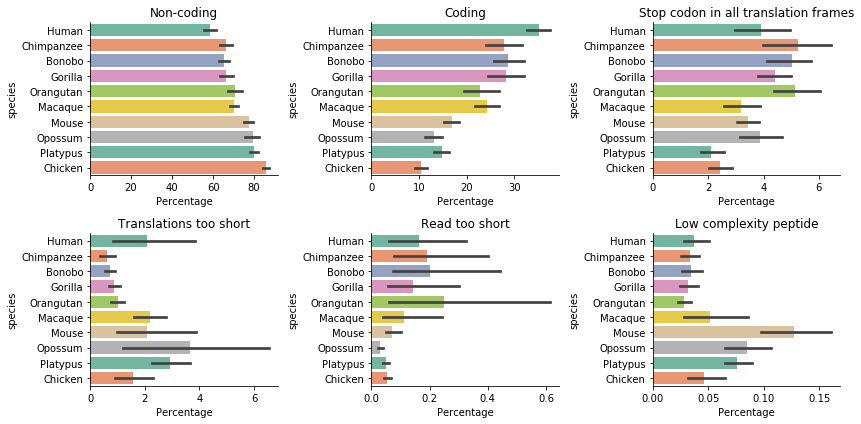

In [99]:
def plot_classification_percentages(data, plotter=sns.barplot, hue=None, palette='Set2',
                                    cols=cols, sharex=False, order=order):
    if hue is None or plotter == sns.stripplot:
        fig_height = 6
    else:
        fig_height = 2 * data[hue].nunique()
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, fig_height), sharex=sharex)
    axes_iter = axes.flat
    for ax, col in zip(axes_iter, cols):
        plotter(y='species', x=col, data=data, ax=ax, order=order, hue=hue,
                palette=palette)
        sns.despine()
        if col.startswith("Low"):
            title = 'Low complexity peptide'
        elif col.startswith("Read"):
            title = "Read too short"
        elif col.startswith("No translation"):
            title = "Stop codon in all translation frames"
        elif col.startswith("All translation"):
            title = "Translations too short"
        else:
            title = col
        ax.set(title=title, xlabel='Percentage')
    for ax in axes.flat:
#         print(f"ax.get_title(): {ax.get_title()}")
#         print(f"ax.get_children(): {ax.get_children()}")
        if ax.get_title() == '':
            ax.axis('off')
    fig.tight_layout()

plot_classification_percentages(classification_percentages_metadata)

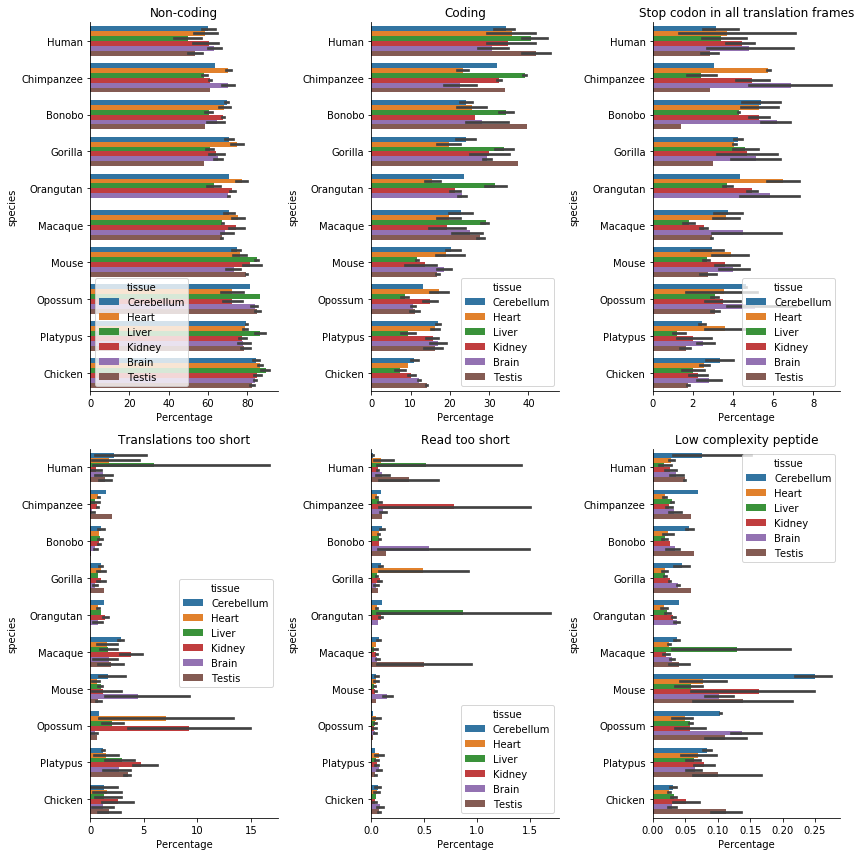

In [100]:
plot_classification_percentages(classification_percentages_metadata, 
                                hue='tissue', palette=palettes['tissue'])

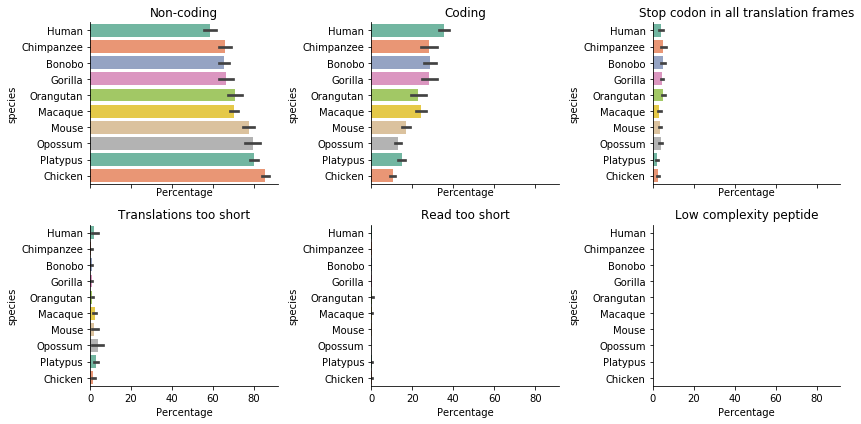

In [101]:
plot_classification_percentages(classification_percentages_metadata, sharex=True)

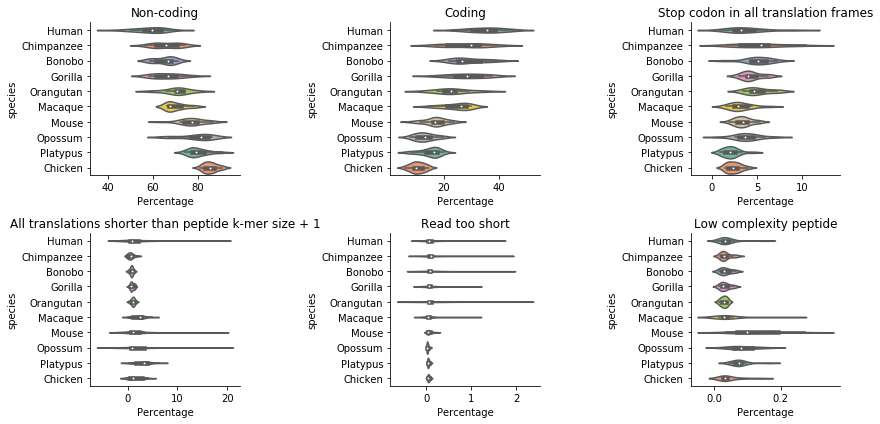

In [79]:
plot_classification_percentages(classification_percentages_metadata, 
                                plotter=sns.violinplot)

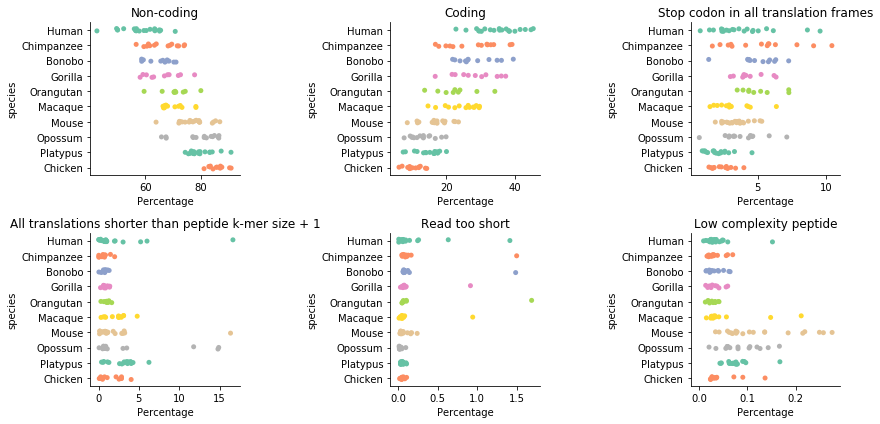

In [80]:
plot_classification_percentages(classification_percentages_metadata, 
                                plotter=sns.stripplot)

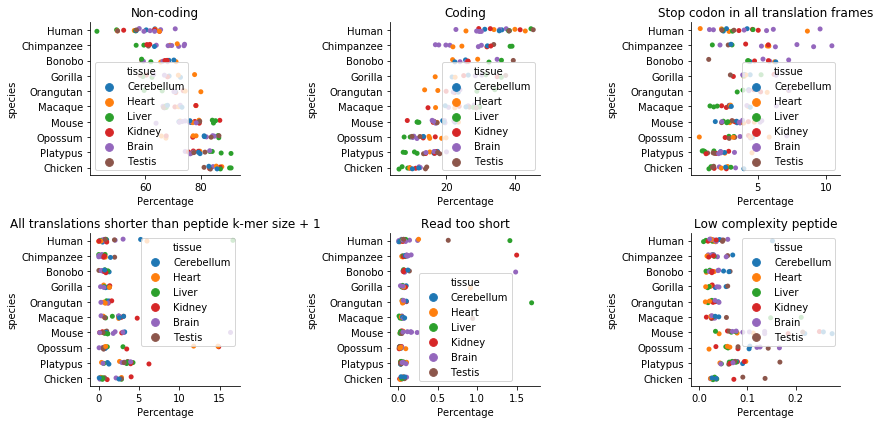

In [81]:
plot_classification_percentages(classification_percentages_metadata, 
                                plotter=sns.stripplot, hue='tissue', palette=palettes['tissue'])

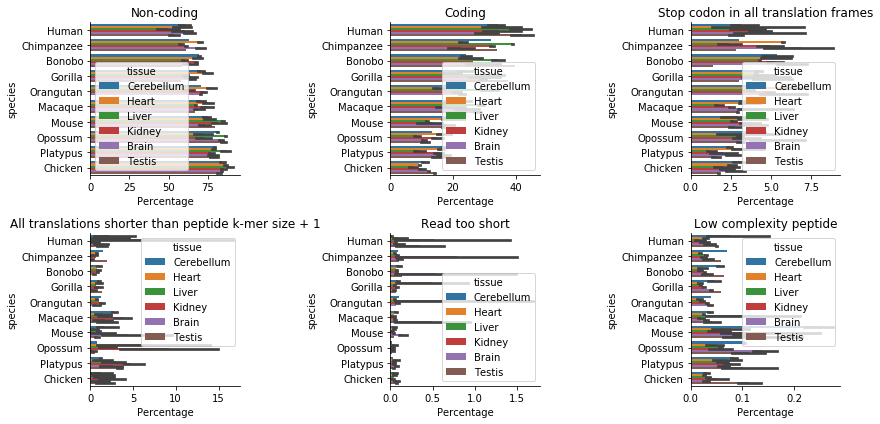

In [82]:
plot_classification_percentages(classification_percentages_metadata, 
                                hue='tissue', palette=palettes['tissue'])

In [ ]:
plot_classification_percentages(classification_percentages_metadata, 
                                hue='tissue', palette=palettes['tissue'])